# Cache all data from Zenodo community

In [1]:
from zenodoExplorer.zenexp import ze

recIDs = [10835267, 10712131, 10890165]
with open("api.key", "r") as keyFile:
    ACCESS_TOKEN = keyFile.readline().rstrip()

ze = ze(ACCESS_TOKEN, recIDs)

# Check available data

In [2]:
ze.read_zdb()
ze.zdb.plot()

# Show table of MD simulations

In [3]:
ze.zdb.to_pd('MDSims')

,pes_model,md_code,md_system,md_no_at,md_ensmb,md_step,md_len,md_temp,md_pres
tag,,,,,,,,,
md1@10835267,ml4@10835267,LAMMPS,"0%, 33%, 67%, 100% EC:EMC",1000,NPT,1.0 fs,1.0 ns,300 K,1 atm
md2@10835267,ml4@10835267,LAMMPS,"0%, 33%, 67%, 100% EC:EMC",1000,NPT,1.0 fs,1.0 ns,350 K,1 atm
md1@10712131,ml3@10712131,ASE,EMC,1000,NPT,1.0 fs,1.0 ns,298 K,1 atm
md2@10712131,ml3@10712131,ASE,"0%, 33%, 67%, 100% EC:EMC",1000,NPT,0.5 fs,0.5-1.0 ns,"298, 298, 298, 313 K",1 atm
md3@10712131,ml4@10712131,ASE,"0%, 33%, 67%, 100% EC:EMC",1000,NPT,1.0 fs,0.5 ns,"298, 298, 298, 313 K",1 atm
md4@10712131,ml1@10712131,ASE,"0%, 33%, 67%, 100% EC:EMC",1000,NPT,1.0 fs,0.8-1.0 ns,"298, 298, 298, 313 K",1 atm
md5@10712131,ml2@10712131,ASE,"0%, 33%, 67%, 100% EC:EMC",1000,NPT,1.0 fs,0.8-1.0 ns,"298, 298, 298, 313 K",1 atm
md1@10890165,ml2@10835267,LAMMPS,"33% EC:EMC (seeds 1,2,3)",640,"NPT, NVT",1.0 fs,0.6 ns,500 K,1 atm
md2@10890165,ml1@10890165,LAMMPS,33% EC:EMC,640,"NPT, NVT",1.0 fs,0.6 ns,500 K,1 atm


# Get data by tag (e.g. MD trajectory)

In [4]:
files = ze.read_dat_files('md4@10890165', ext='.thermo')

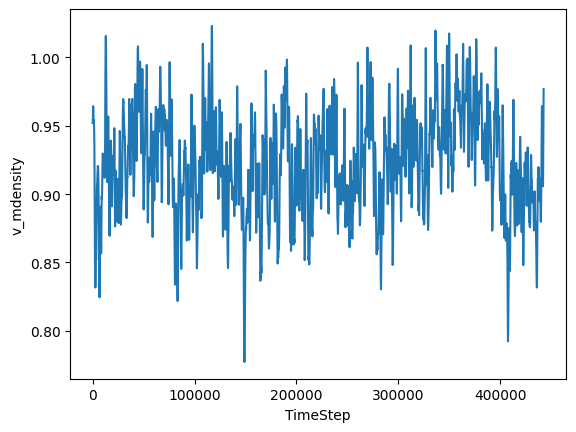

In [5]:
from aseMolec import pltProps as pp

traj = pp.loadtxttag(files[0])
pp.simpleplot(traj, 0, 2)

# Remove some data (including dependencies) from the tables

In [8]:
ze.zdb.del_dat_tree('td1@10835267')
ze.zdb.del_dat_tree('td1@10890165')
ze.zdb.del_dat_tree('ml3@10835267')
ze.zdb.del_dat_tree('md1@10712131')
ze.zdb.del_dat_tree('md2@10835267')
ze.zdb.plot()